In [1]:
import numpy as np
import matplotlib.pyplot as plt

# H.2 - Symplectic Integrators and Runge-Kutta method

## a) Implementation of the RK4 method

In [2]:
fx = lambda x: np.array([x[1], -x[0]])

In [3]:
def get_coefficients(x, step):
    k1 = step * fx(x)
    k2 = step * fx(x + k1 / 2)
    k3 = step * fx(x + k2 / 2)
    k4 = step * fx(x + k3)
    return k1, k2, k3, k4


def RK4(x, step):
    k1, k2, k3, k4 = get_coefficients(x, step)
    return x + (k1 + 2 * k2 + 2 * k3 + k4) / 6

## b) Implementation of a symplectic integration method

In [4]:
def symplectic_euler(x, step):
    p = x[1] - step * x[0]
    q = x[0] + step * p
    return np.array([q, p])

## c) Integration using both methods

In [5]:
def integration(initial_conditions, time, step, method):
    time_evolution = [initial_conditions]
    N = int(time / step)

    for n in range(N):
        time_evolution.append(method(time_evolution[-1], step))

    return time_evolution

def plot_trajectory(time_evolution, step, title=''):
    t = np.arange(0, len(time_evolution)) * step
    plt.plot(t, [x[0] for x in time_evolution], label='position')
    plt.plot(t, [x[1] for x in time_evolution], linestyle='--', label='momentum')
    plt.xlabel('Time')
    plt.title(title)

    plt.ylim(-1.2, 1.5)
    plt.grid()
    plt.legend()

In [6]:
# Define initial conditions and parameters
initial_conditions, time, step = np.array([1, 0]), 4 * np.pi, 0.01

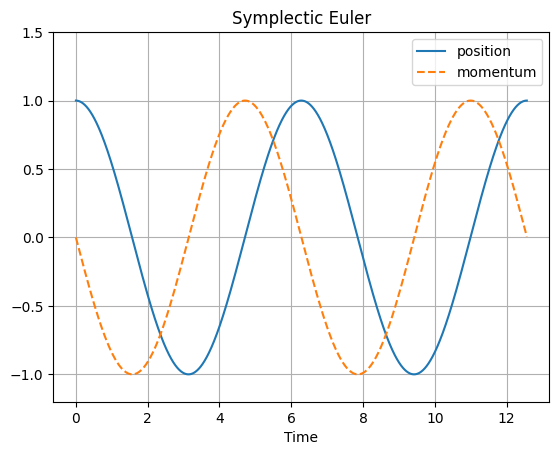

In [7]:
# Symplectic Euler
time_evolution_SE = integration(initial_conditions, time, step, symplectic_euler)
plot_trajectory(time_evolution_SE, step, title='Symplectic Euler')

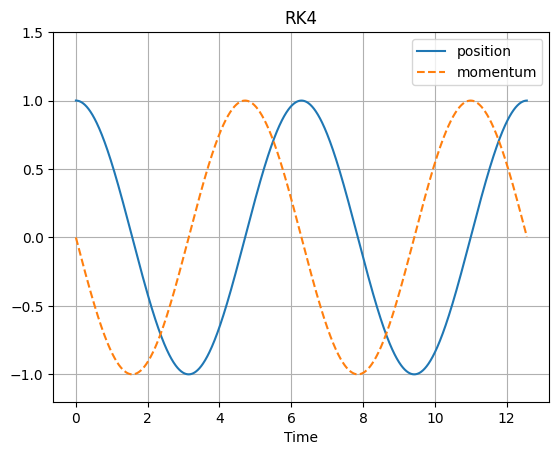

In [8]:
# RK4
time_evolution_RK4 = integration(initial_conditions, time, step, RK4)
plot_trajectory(time_evolution_RK4, step, title='RK4')

## d) Energies at each time step

In [9]:
# RK4

energy = lambda x: (x[0] ** 2 + x[1] ** 2) / 2

energy_SE = [energy(x) for x in time_evolution_SE]
energy_RK4 = [energy(x) for x in time_evolution_RK4]

## e) Energy as a function of the time steps

Text(0, 0.5, 'Energy')

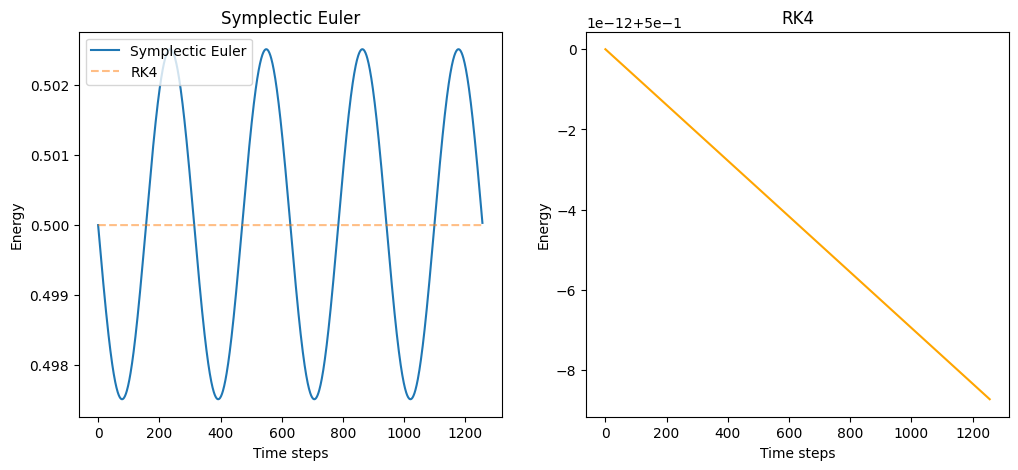

In [10]:
time_steps = np.arange(0, int(time / step) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(time_steps, energy_SE, label='Symplectic Euler')
ax[0].plot(time_steps, energy_RK4, alpha=0.5, linestyle='--', label='RK4')
ax[0].legend()


ax[1].plot(time_steps, energy_RK4, color='orange', label='RK4')

ax[0].set_title('Symplectic Euler')
ax[1].set_title('RK4')

ax[0].set_xlabel('Time steps')
ax[1].set_xlabel('Time steps')

ax[0].set_ylabel('Energy')
ax[1].set_ylabel('Energy')

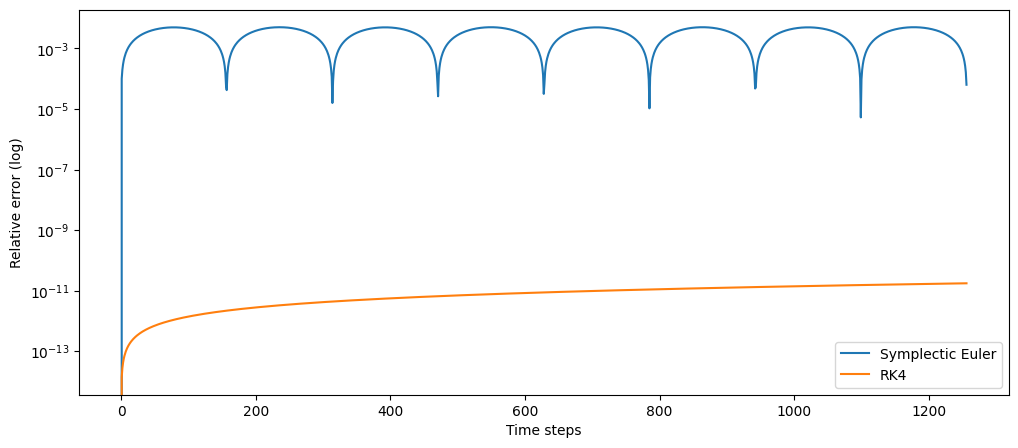

In [12]:
E0 = energy(initial_conditions)

rel_error_SE = np.abs((energy_SE - E0) / E0)
rel_error_RK4 = np.abs((energy_RK4 - E0) / E0)

plt.figure(figsize=(12, 5))
plt.plot(time_steps, rel_error_SE, label='Symplectic Euler')
plt.plot(time_steps, rel_error_RK4, label='RK4')
plt.yscale('log')
plt.xlabel('Time steps')
plt.ylabel('Relative error (log)')
plt.legend();

## Long term energy conservation

/Users/felixstrohkirch/Desktop/Master_Thesis/coding/graphene/master-thesis-venv/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/felixstrohkirch/Desktop/Master_Thesis/coding/graphene/master-thesis-venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


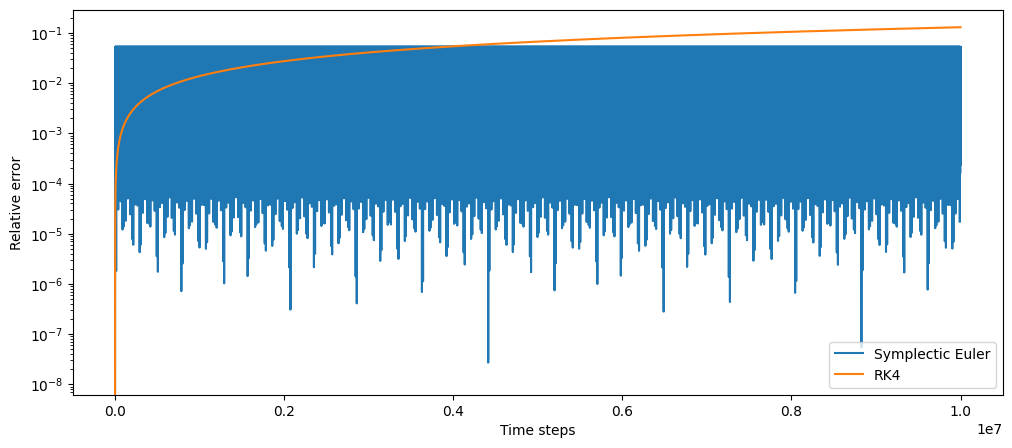

In [13]:
time = 1_000_000
step = 0.1

# Symplectic Euler
time_evolution_SE = integration(initial_conditions, time, step, symplectic_euler)
energy_SE = [energy(x) for x in time_evolution_SE]
rel_error_SE = np.abs((energy_SE - E0) / E0)

# RK4
time_evolution_RK4 = integration(initial_conditions, time, step, RK4)
energy_RK4 = [energy(x) for x in time_evolution_RK4]
rel_error_RK4 = np.abs((energy_RK4 - E0) / E0)

plt.figure(figsize=(12, 5))

time_steps = np.arange(0, int(time / step) + 1)
plt.plot(time_steps[::10], rel_error_SE[::10], label='Symplectic Euler')
plt.plot(time_steps, rel_error_RK4, label='RK4')
plt.yscale('log')
plt.xlabel('Time steps')
plt.ylabel('Relative error')
plt.legend();

Over the long term the symplectic integration method shows better energy conservation. One can observe an oscillating relative energy error that is bounded from above. On the other hand, the relative energy error for the RK4 method is a monotonic function of the number of steps and surpasses the symplectic method's upper limit for large times and fixed step size.